## Bibliothèques & données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librairie Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

## I. Régression linéaire simple

In [2]:
path = "reg_simple.csv"
reg_simple = pd.read_csv(path)
reg_simple.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


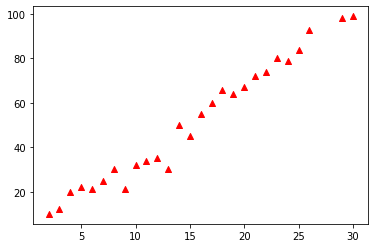

In [3]:
#plot
fig, ax = plt.subplots()

ax.scatter(reg_simple["heure_rev"], reg_simple["note"], c = 'red', marker= '^')
plt.show()

In [4]:
xn= np.array(reg_simple["heure_rev"])
xn=xn.reshape(len(xn), 1)
#x1 = []
#for i in range(len(xn)):
#    x1.append(1)
x1 =np.ones(xn.shape)
x1.shape

(27, 1)

In [5]:
xn.shape

(27, 1)

In [6]:
#Création de la matrice X, composée de la feature xn (colonne heure_rev)
X = np.hstack((xn, x1))
X

array([[ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [29.,  1.],
       [30.,  1.]])

In [7]:
#Création du theta
a = np.random.randint(0, 10)
b = np.random.randint(0, 10)
theta = np.hstack((a, b))
theta=np.random.randn(2,1)
theta

array([[0.94241077],
       [1.91849944]])

### 3. Création du modèle

In [8]:
def model(X, theta):
    F = X.dot(theta)
    return F

In [9]:
y_predit = model(X, theta)
y_predit

array([[ 3.80332097],
       [ 4.74573174],
       [ 5.68814251],
       [ 6.63055327],
       [ 7.57296404],
       [ 8.51537481],
       [ 9.45778557],
       [10.40019634],
       [11.34260711],
       [12.28501787],
       [13.22742864],
       [14.16983941],
       [15.11225017],
       [16.05466094],
       [16.99707171],
       [17.93948247],
       [18.88189324],
       [19.82430401],
       [20.76671478],
       [21.70912554],
       [22.65153631],
       [23.59394708],
       [24.53635784],
       [25.47876861],
       [26.42117938],
       [29.24841168],
       [30.19082244]])

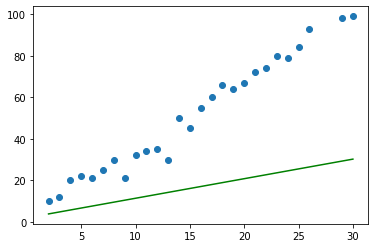

In [10]:
plt.scatter(xn,reg_simple["note"])
plt.plot(xn,model(X, theta), 'g')
plt.show()

### 4. Fonction coût

In [11]:
def cout(X, y, theta):
    m = len(y)
    resultat =  1/(2*m) * (np.sum((model(X, theta) - y)**2))
    return resultat

In [12]:
y_obs = np.array(reg_simple['note'])
y_obs = y_obs.reshape(len(y_obs), 1)
y_obs
cout(X, y_obs, theta)

802.8054433159358

### 5. Fonction gradient

In [13]:
def gradient(X, y, theta):
    resultat = ((X.T).dot((model(X,theta)) - y))/(len(y))
    return resultat

In [14]:
gradient(X, y_obs, theta)

array([[-682.8388826 ],
       [ -34.84275969]])

### 6. Fonction gradient descendant

In [15]:
cost_history = np.zeros(4) 
cost_history

array([0., 0., 0., 0.])

In [16]:
def descente_gradient(X, y, theta, alpha, n_iterations):
    #création d'un tableau de stockage pour enregistrer l'évolution du coût
    cout_evolution = np.zeros(n_iterations)
    theta_evolution = []
    
    for i in range(0, n_iterations):
        theta = theta - alpha * gradient(X, y, theta) #on calcule le nouveau theta (un vecteur de 2 lignes x 1 colonne)
        cout_evolution[i] =  cout(X, y, theta) # on enregistre le coût pour chaque tour
        theta_evolution.append(theta)
    return theta, cout_evolution


In [17]:
alpha = 0.001
n_iteration = 30
descente_gradient(X, y_obs, theta, alpha, n_iteration)

(array([[3.25838359],
        [2.02731624]]),
 array([404.25093539, 206.09856375, 107.58161287,  58.60114525,
         34.24909949,  22.14174946,  16.1221859 ,  13.12933245,
         11.641291  ,  10.90140817,  10.53349293,  10.35051163,
         10.25947533,  10.21415204,  10.19155625,  10.1802601 ,
         10.17458189,  10.17169682,  10.17020047,  10.16939459,
         10.16893201,  10.16864015,  10.16843319,  10.16826848,
         10.16812478,  10.16799157,  10.1678636 ,  10.16773826,
         10.16761425,  10.16749093]))

### 7. Evaluer votre modèle en utilisant le coefficient de détermination

In [18]:
#Fontion pour calculer le coefficient de détermination
def coeff_determination(X, y, theta):
    i = y - model(X, theta)
    j = y - np.mean(y)
    r2 = 1-(np.sum(i**2)/np.sum(j**2))
    return r2 

In [19]:
new_theta, cout_evolution = descente_gradient(X, y_obs, theta, alpha, n_iteration)
coeff_determination(X, y_obs, new_theta)

0.9725655560619499

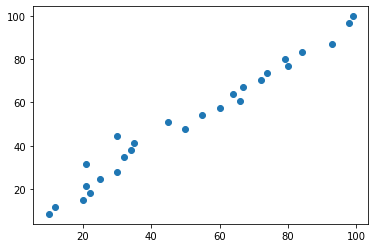

In [20]:
#Nouveau y_predits avec les nouveaux paramètres a & b
y_predits = model(X, new_theta)

#Plot de valeurs prédites avec valeurs observées
plt.scatter(y_obs, y_predits)
plt.show()

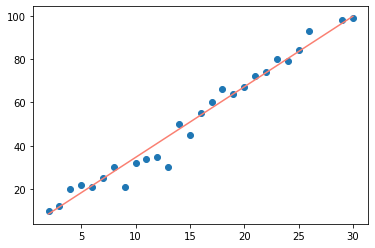

In [21]:
#plt.scatter(xn, y_obs)
plt.scatter(xn, y_obs)
plt.plot(xn,y_predits, c = 'salmon')
plt.show()

### 8. Tracer la courbe de la fonction du coût selon les itérations

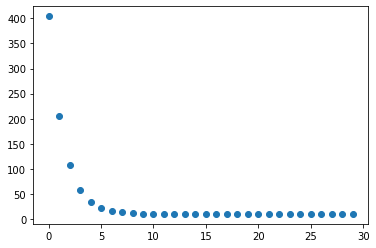

In [22]:
# Définition des variables
n = np.arange(30)
#cout_evolution = descente_gradient(X, y_obs, theta, 0.01, 30)[1]

# Plot
plt.scatter(n, cout_evolution)
plt.show()

#### Calcul de l'erreur

In [23]:
mse_lin_manuel = mean_squared_error(y_obs, y_predits)
mse_lin_manuel

20.33498186821034

## II. Régression linéaire multiple

In [24]:
path2 = "boston_house_prices.csv"
boston_prices = pd.read_csv(path2)
boston_prices.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [25]:
boston_prices.shape

(506, 14)

In [26]:
boston_prices.corrwith(boston_prices['MEDV'], method = 'pearson').sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

In [27]:
boston_prices.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [28]:
#Définition des features
features = boston_prices[['RM', 'LSTAT']]   # ==> choix des features RM et LSTAT car corrélation forte avec la target MDEV 
ones = np.ones(features.shape[0]).reshape(len(features), 1)
X = np.hstack((features, ones))
X.shape

#Défintion de la target
y_obs = boston_prices['MEDV']
y_obs.shape

(506,)

In [29]:
#Définition du theta
a = np.random.randint(0, 10)
b = np.random.randint(0, 10)
c = np.random.randint(0, 10)
theta = np.hstack((a,b,c))
theta

array([7, 4, 9])

### 1. Calcul du modèle

In [30]:
y_predicts = model(X, theta)
y_predicts

array([ 74.945,  90.507,  75.415,  69.746,  80.349,  74.85 , 100.804,
       128.804, 168.137, 119.428, 135.439, 104.143, 113.063,  83.683,
        92.712,  83.718,  76.865, 109.61 ,  93.952,  94.209, 132.07 ,
       106.075, 126.874, 129.211, 115.668, 114.233, 108.931, 120.449,
       105.665, 103.638, 139.391, 103.664, 161.49 , 122.307, 133.032,
        89.251,  95.527,  85.03 ,  91.282,  72.445,  66.088,  75.75 ,
        75.423,  82.237,  89.683,  89.614, 106.102, 126.41 , 170.033,
       113.014, 104.541,  89.525,  75.697,  84.706, 109.416,  78.983,
        76.761,  72.512,  79.455,  87.369, 101.787, 108.522,  81.112,
        94.334,  90.928,  71.71 ,  90.469,  82.546, 100.518,  85.355,
        80.799,  90.247,  73.535,  82.875,  80.031,  88.762, 100.833,
        93.06 , 101.984,  86.518,  77.249,  84.213,  79.994,  82.209,
        92.203,  81.53 , 102.545,  85.607,  80.049,  81.353,  89.159,
        86.635,  86.734,  77.317,  95.103,  81.975,  97.501,  82.323,
        78.02 ,  85.

### 2. Calcul de la fonction coût

In [31]:
cout_reg_mult = cout(X, y_obs, theta)
cout_reg_mult

3823.7109759120553

### 3. Calcul du gradient

In [32]:
gradient_reg_mult = gradient(X, y_obs, theta)
gradient_reg_mult

array([ 496.17685219, 1256.21984257,   81.07188735])

### 4. Calcul du gradient descendant

In [33]:
alpha = 0.001
n_iteration = 30
theta_final, cout_evolution_reg_m = descente_gradient(X, y_obs, theta, alpha, n_iteration)

In [34]:
#Calcul du nouveau y
y_predit = model(X, theta_final)
y_predit

array([ 3.36976880e+01,  2.84320690e+01,  3.75687489e+01,  3.78929974e+01,
        3.59702469e+01,  3.27729449e+01,  2.29343561e+01,  1.63260100e+01,
        2.02206566e+00,  1.77886238e+01,  1.58556014e+01,  2.20015386e+01,
        1.87752974e+01,  2.72035223e+01,  2.56981147e+01,  2.64399283e+01,
        2.89763102e+01,  2.03818496e+01,  2.11627028e+01,  2.28692884e+01,
        1.14856841e+01,  2.11846811e+01,  1.66571236e+01,  1.38608432e+01,
        1.82923688e+01,  1.65538792e+01,  1.94070035e+01,  1.77913402e+01,
        2.47718666e+01,  2.64998611e+01,  1.04211524e+01,  2.25456082e+01,
        5.93147469e+00,  1.50145923e+01,  1.46714291e+01,  2.55758821e+01,
        2.32563082e+01,  2.61860309e+01,  2.52368172e+01,  3.45125206e+01,
        3.90638593e+01,  3.47560966e+01,  3.09049386e+01,  2.93168327e+01,
        2.63494522e+01,  2.38308736e+01,  2.00036452e+01,  1.60496659e+01,
       -1.76089885e-02,  1.69069207e+01,  2.15910849e+01,  2.66942709e+01,
        3.30724018e+01,  

### 5. Fonction de cout par rapport aux itérations

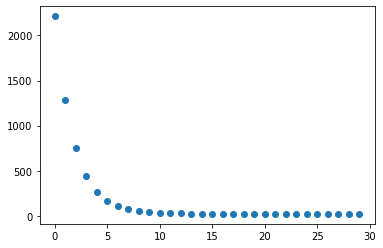

In [35]:
n =np.arange(n_iteration)
plt.scatter(n, cout_evolution_reg_m)
plt.show()

In [36]:
#Calcul du coefficience de détermin
R2 = coeff_determination(X, y_obs, theta)
R2

-89.58827480302483

### 6. Calcul de l'erreur

In [37]:
from sklearn.metrics import mean_squared_error

mse_mult_manuel = mean_squared_error(y_obs, y_predit)
mse_mult_manuel

41.760504790916265

## III. Régression Polynomiale

In [38]:
path = 'Position_Salaries.csv'
salaire = pd.read_csv(path)
salaire

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


In [39]:
salaire.shape

(10, 3)

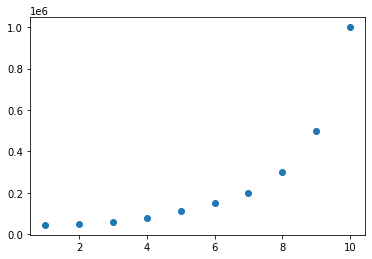

In [40]:
plt.scatter(salaire['Level'], salaire['Salary'])
plt.show()

In [41]:
#Features & target
x = salaire['Level']
x2 = x.pow(2)
ones = np.ones(len(x))
y = salaire['Salary']

#Reshape
x = np.array(x)
x = x.reshape(len(x), 1)
x2 = np.array(x2)
x2 = x2.reshape(len(x2), 1)
ones = ones.reshape(len(ones), 1)
y = np.array(y)
y = y.reshape(len(y), 1)

#Matrice X
X = np.hstack((x2, x, ones))
X.shape

(10, 3)

In [42]:
#Theta
theta = np.random.randn(3, 1)
theta

array([[-0.50628031],
       [ 0.12793403],
       [ 0.66839353]])

### 1. Calcul du modèle

In [43]:
y_pred = model(X, theta)
y_pred

array([[  0.29004724],
       [ -1.10085966],
       [ -3.50432718],
       [ -6.92035533],
       [-11.34894409],
       [-16.79009348],
       [-23.24380349],
       [-30.71007411],
       [-39.18890536],
       [-48.68029723]])

### 2. Calcul de la fonction coût

In [44]:
cout_polynom = cout(X, y, theta)
cout_polynom

71464921224.01746

### 3. Calcul du gradient

In [45]:
gradient_polynom = gradient(X, y, theta)
gradient_polynom

array([[-17972718.12671598],
       [ -2039644.54816941],
       [  -249518.11976127]])

### 4. Calcul du gradient descendant

In [46]:
alpha = 0.0001
n_iter = 30

theta_new, cout_evol_polynom = descente_gradient(X, y, theta, alpha, n_iter)

In [47]:
#Calcul du nouveau y

y_predi = model(X, theta_new)

### 5. Fonction de cout par rapport aux itérations

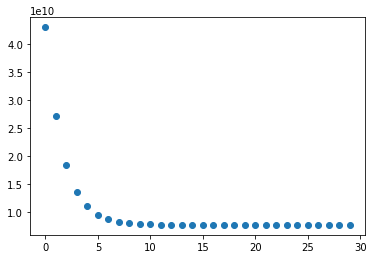

In [48]:
n = np.arange(n_iter)

plt.scatter(n, cout_evol_polynom)
plt.show()

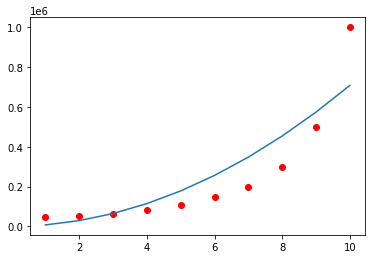

In [49]:
plt.scatter(X[:, 1], y, c='r')
plt.plot(X[:, 1], y_predi)
plt.show()

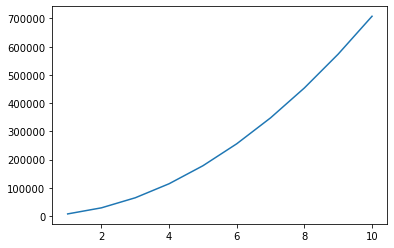

In [50]:
plt.plot(X[:, 1], y_predi)
plt.show()

### 6. Calcul de l'erreur

In [51]:
mse_poly_manuel = mean_squared_error(y, y_predi)
mse_poly_manuel

15532945210.560581

### Dataframe du vin

In [52]:
path_vin = 'qualite-vin-rouge.csv'
df_vin = pd.read_csv(path_vin)
df_vin.head()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [53]:
df_vin.shape

(1599, 12)

In [54]:
df_vin.dtypes

acidité fixe                 float64
acidité volatile             float64
acide citrique               float64
sucre résiduel               float64
chlorures                    float64
dioxyde de soufre libre      float64
anhydride sulfureux total    float64
densité                      float64
pH                           float64
sulphates                    float64
alcool                       float64
qualité                        int64
dtype: object

#### Corrélation entre les variables

In [55]:
df_vin.corrwith(df_vin['qualité']).sort_values(ascending = False)

qualité                      1.000000
alcool                       0.476166
sulphates                    0.251397
acide citrique               0.226373
acidité fixe                 0.124052
sucre résiduel               0.013732
dioxyde de soufre libre     -0.050656
pH                          -0.057731
chlorures                   -0.128907
densité                     -0.174919
anhydride sulfureux total   -0.185100
acidité volatile            -0.390558
dtype: float64

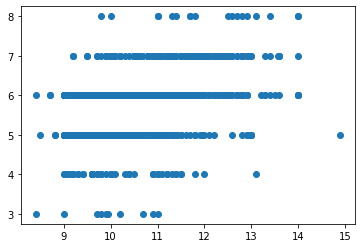

In [56]:
plt.scatter(df_vin['alcool'], df_vin['qualité'])
plt.show()

In [57]:
#Features
x = df_vin['alcool']
x2 =x.pow(2)
ones =np.ones(len(x)).reshape(-1, 1)
x = np.array(x).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)

#Target
y = df_vin['qualité']
y = np.array(y).reshape(-1, 1)

#Matrice X
X = np.hstack((x2, x, ones))

#Theta
theta = np.random.randn(3, 1)
theta
X

array([[ 88.36,   9.4 ,   1.  ],
       [ 96.04,   9.8 ,   1.  ],
       [ 96.04,   9.8 ,   1.  ],
       ...,
       [121.  ,  11.  ,   1.  ],
       [104.04,  10.2 ,   1.  ],
       [121.  ,  11.  ,   1.  ]])

In [58]:
#Model
y_pre = model(X, theta)

#Coût
cout_vin = cout(X, y, theta)

#gradient
gradient_vin = gradient(X, y, theta)

#Descente de gradient
alpha = 0.001
n_iteration = 30
new_theta_vin, cout_evolution_vin = descente_gradient(X, y, theta, alpha, n_iteration)



In [59]:
y_new = model(X, new_theta_vin)
y_new

array([[1.03549607e+34],
       [1.12504035e+34],
       [1.12504035e+34],
       ...,
       [1.41595151e+34],
       [1.21829768e+34],
       [1.41595151e+34]])

## IV. Scikit-Learn

### 1. Régression Linéaire
Dataframe des notes en fonction des heures révision

In [60]:
#Conversion du dataframe en numpy array
np_reg_simple = reg_simple.to_numpy()

#Feature
X = np_reg_simple[:, 0]
X = X.reshape(-1, 1)

#Target
y = np_reg_simple[:, 1]
y = y.reshape(-1, 1)

#Fractionnement du jeu de données en x_train, x_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Définition du modèle
model = LinearRegression()

#Entrainement du modèle
model.fit(X_train, y_train)

#Prédiction des y
y_predict = model.predict(X_test)


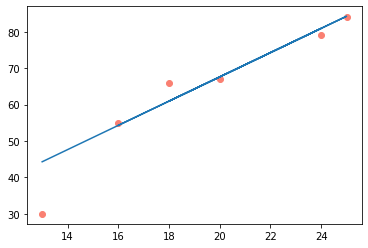

In [61]:
#Visualisation des résultats du modèle sur les valeurs tests
plt.scatter(X_test, y_test, c = 'salmon')
plt.plot(X_test, y_predict)
plt.show()

In [62]:
#Calcul de la Mean Squared Error
mse_lin_skl = mean_squared_error(y_test, y_predict)
round(mse_lin_skl, 3)

39.138

#### Comparaison des modèles

In [63]:
print(f"L'erreur quadratique à la moyenne est de {round(mse_lin_manuel, 3)} pour le modèle manuel et de {round(mse_lin_skl, 3)} pour le modèle de SK-Learn.")

L'erreur quadratique à la moyenne est de 20.335 pour le modèle manuel et de 39.138 pour le modèle de SK-Learn.


### 2. Régression multiple

In [64]:
boston_prices.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [65]:
#Conversion du dataframe en numpy array
#np_boston_prices = boston_prices.to_numpy()

#Feature
X = boston_prices[['RM', 'LSTAT']]

#Target
y = boston_prices['MEDV']

#Fractionnement du jeu de données en x_train, x_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Définition du modèle
model = LinearRegression()

#Entrainement du modèle
model.fit(X_train, y_train)

#Prédiction des y
y_predits = model.predict(X_test)
y_predits.shape
#y_test.shape

(102,)

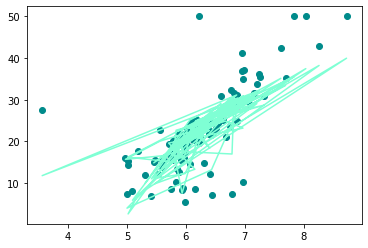

In [66]:
#Visualisation des résultats du modèle sur les valeurs tests
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
plt.scatter(X_test.iloc[:, 0], y_test, c = 'darkcyan')
plt.plot(X_test.iloc[:, 0], y_predits, c = 'aquamarine')
plt.show()


In [67]:
#Calcul de la Mean Squared Error
mse_mult_skl = mean_squared_error(y_test, y_predits)
mse_mult_skl

30.060024569214676

#### Comparaison des modèles

In [68]:
print(f"L'erreur quadratique à la moyenne est de {round(mse_mult_manuel, 3)} pour le modèle manuel et de {round(mse_mult_skl, 3)} pour le modèle de SK-Learn.")

L'erreur quadratique à la moyenne est de 41.761 pour le modèle manuel et de 30.06 pour le modèle de SK-Learn.


### 3. Régression polynomiale

In [69]:
#Conversion du dataframe en numpy array
np_salaire = salaire.to_numpy()

#Feature
X = np_salaire[:,1]
X = X.reshape(-1, 1)

#Target
y = np_salaire[:, 2]
y = y.reshape(-1, 1)

#Polynomiale
polynomiale = PolynomialFeatures(degree = 3)
X = polynomiale.fit_transform(X)

#Fractionnement du jeu de données en x_train, x_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#Définition du modèle
model = LinearRegression()

#Entrainement du modèle
model.fit(X_train, y_train)

#Prédiction des y
y_predicts = model.predict(X_test)


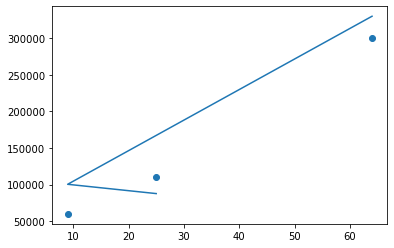

In [70]:
#Visualisation des résultats du modèle sur les valeurs tests
plt.scatter(X_test[:, 2], y_test)
plt.plot(X_test[:,2], y_predicts)
plt.show()

In [71]:
#Calcul de la Mean Squared Error
mse_poly_skl = mean_squared_error(y_test, y_predicts)
mse_poly_skl

1015086453.4470906

#### Comparaison des modèles

In [72]:
print(f"L'erreur quadratique à la moyenne est de {round(mse_poly_manuel, 3)} pour le modèle manuel et de {round(mse_poly_skl, 3)} pour le modèle de SK-Learn.")

L'erreur quadratique à la moyenne est de 15532945210.561 pour le modèle manuel et de 1015086453.447 pour le modèle de SK-Learn.
